# Hierarchical Clustering

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import division
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import cv2
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Peter/python-fundamentals/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Perform hierarchical clustering on observations (columns)

In [45]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
import scipy.spatial.distance as ssd
from faker import Factory

fake = Factory.create()
colorList = []

for i in range(5000):
    colorList.append(fake.hex_color())

set_link_color_palette(colorList)

df = pd.read_csv('know_your_y.csv')

df.reset_index(inplace=True, drop=True)

df['Player_ID'] = df['Player_ID'].astype(int)
y = np.array(df['OBPM 3-4-5'].values)
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].values)
images = []
for i in range(len(pid)):
    images.append(cv2.imread('thumbnails/thumbnail_{0}_{1}-{2}.png'.format(str(pid[i]), str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)

/Users/Peter/python-fundamentals/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


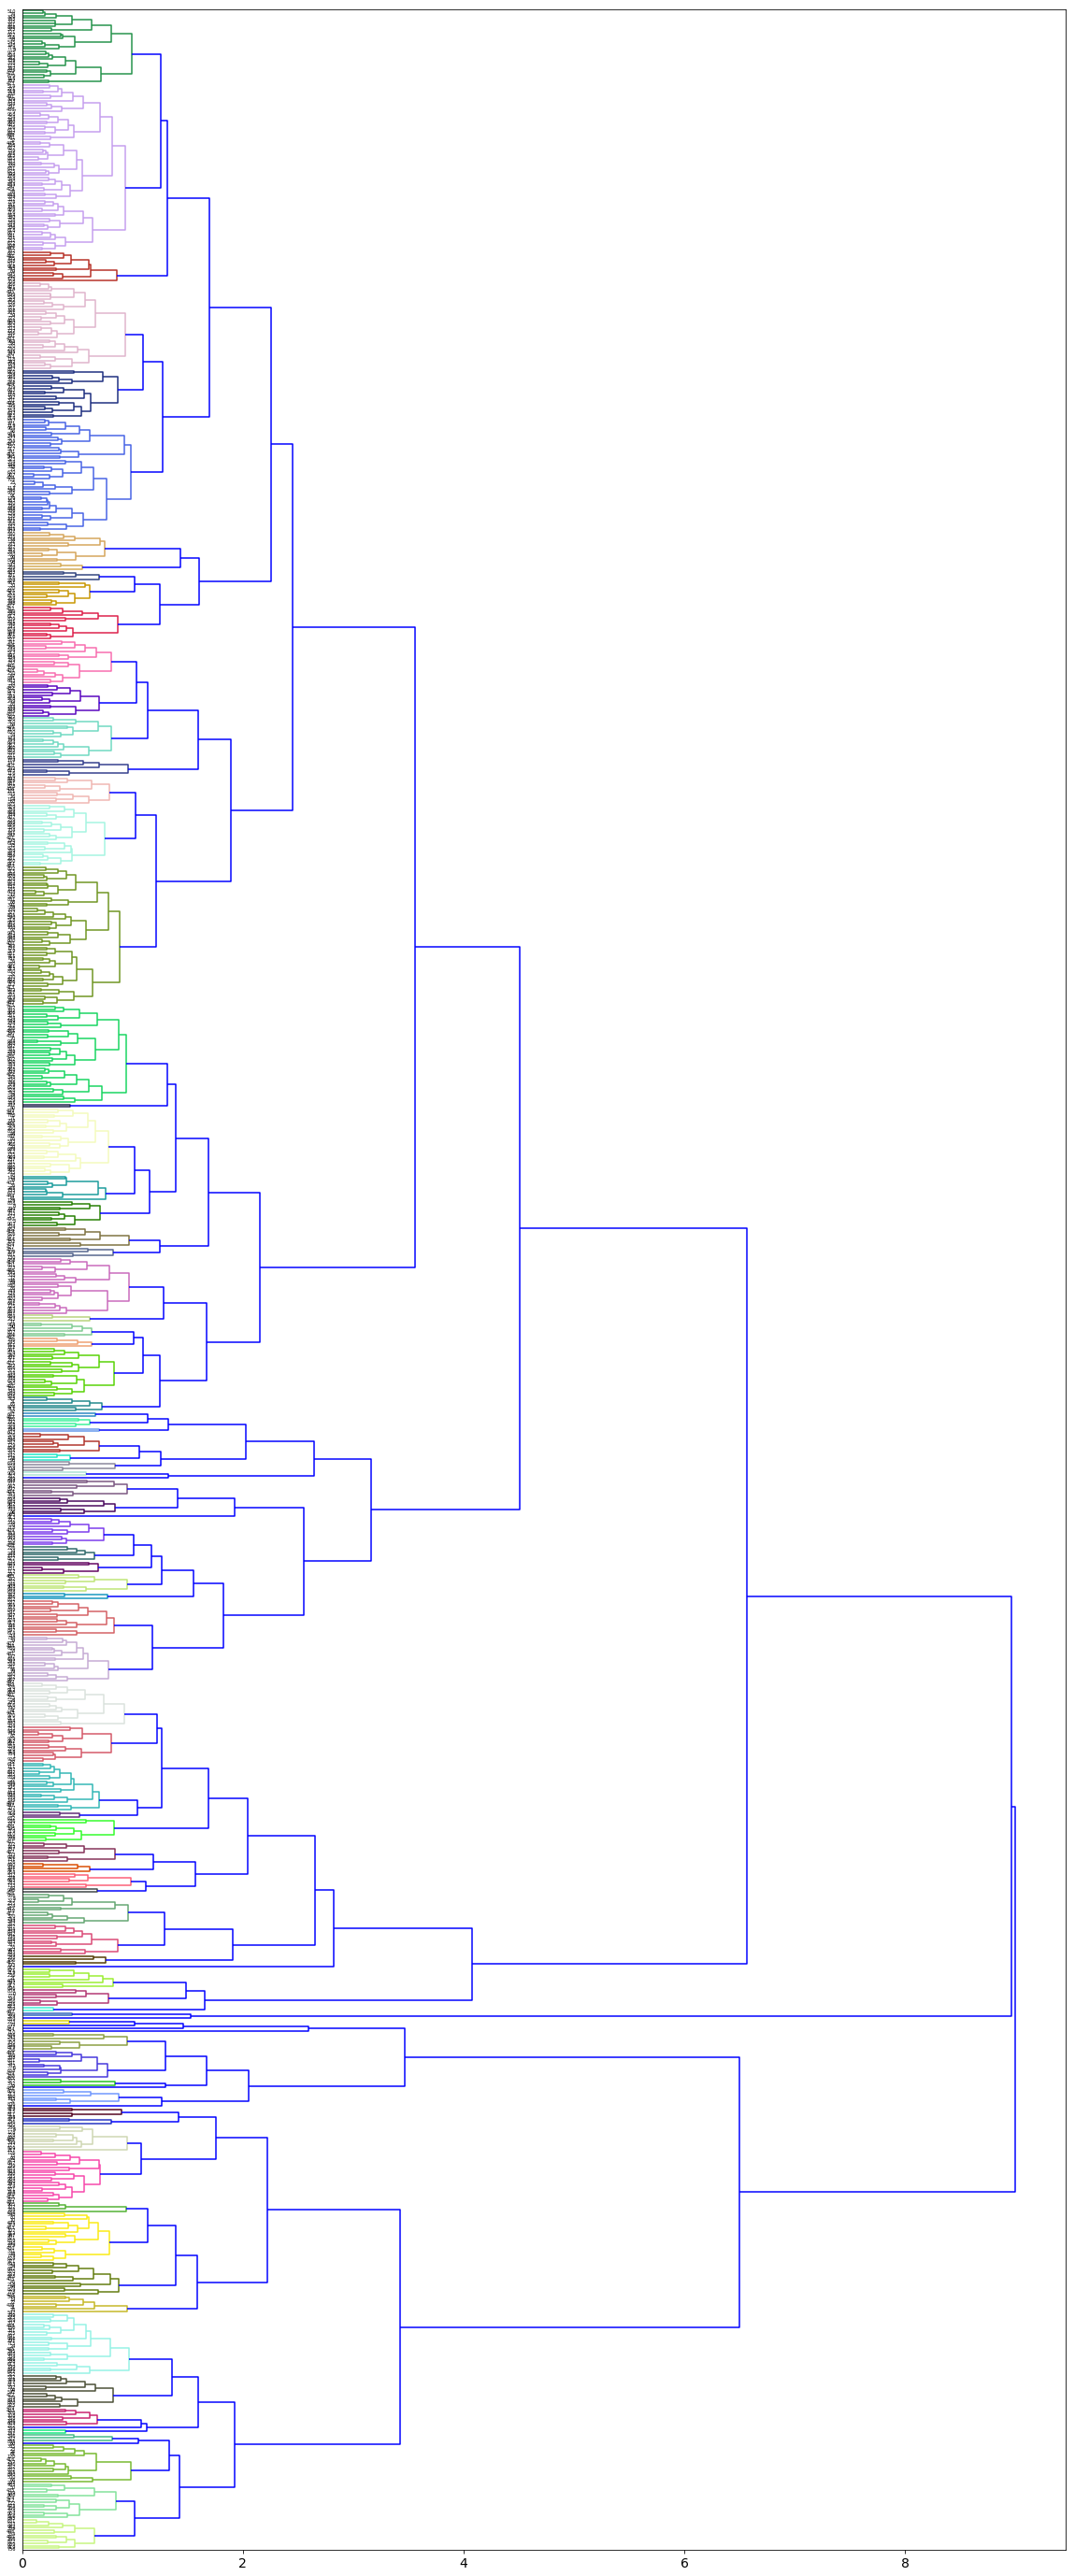

In [46]:
# Create distance matrix on columns using cosine distance
# convert the redundant n*n square matrix form into a condensed nC2 array
dist = ssd.squareform(pdist(X, 'cosine'))
clust = linkage(dist, method='complete')

fig, ax = plt.subplots(figsize=(20,50))
_ = dendrogram(clust, color_threshold=1, orientation='right', ax=ax)
_ = plt.xticks(fontsize=14)

In [47]:
R = dendrogram(clust,
                color_threshold=1, no_plot=True)

In [48]:
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

lineups = get_cluster_classes(R)

In [49]:
lineups

#c7f580,"['756', '819', '689', '872', '268', '460', '334', '446', '533', '651', '982', '359', '689']"
#82e29b,"['516', '904', '845', '206', '673', '374', '122', '412', '424', '900', '139', '435', '50', '955', '139']"
#76b930,"['66', '500', '293', '355', '832', '257', '416', '140', '552', '890', '23', '385', '26', '81', '120']"
#43ba86,"['322', '346', '885']"
b,"['60', '349', '383', '482', '677', '484', '710', '869', '283', '915', '913', '289', '932']"
#15e87d,"['292', '777']"
#c9226e,"['222', '609', '196', '368', '378', '407', '108']"
#4a4e35,"['459', '925', '339', '472', '893', '820', '94', '192', '358', '582', '717', '813', '541']"
#95f2e5,"['622', '896', '199', '613', '522', '588', '986', '304', '688', '345', '465', '24', '715', '291', '946', '691', '725', '150', '458', '381', '307', '569', '525', '799']"
#c5b827,"['51', '476', '19', '544', '72', '76', '592']"
#637c0e,"['778', '824', '428', '44', '218', '405', '928', '45', '227', '870', '34', '693', '682']"


In [73]:
thing = []

for ok in range(len(list(lineups.values()))):
    comps = list(lineups.values())[ok]

    for i in comps:
        thing.append([df['Player'][int(i)], df['Yr'][int(i)], df['Age'][int(i)], df['OBPM'][int(i)], ok, df['OBPM 3-4-5'][int(i)]])
    loadout = pd.DataFrame(thing)
    loadout.rename(columns={0:'Player', 1: 'Year', 2: 'Age', 3: 'OBPM', 4: 'Cluster', 5:'OBPM 3-4-5'},inplace=True)
    loadout = loadout.sort_values('OBPM 3-4-5', ascending=False)
    loadout.reset_index(inplace=True, drop=True)
    print(loadout)
    print('------------')

dx = pd.DataFrame(thing)
dx.rename(columns={0:'Player', 1: 'Year', 2: 'Age', 3: 'OBPM', 4: 'Cluster', 5:'OBPM 3-4-5'},inplace=True)

              Player  Year  Age  OBPM  Cluster  OBPM 3-4-5
0      Zach Randolph  2003   21   0.6        0         0.0
1   Rasho Nesterovic  2000   23  -2.3        0        -1.2
2          Ike Diogu  2006   22  -2.0        0        -1.4
3         JJ Hickson  2009   20  -4.7        0        -1.7
4     Stromile Swift  2001   21  -3.4        0        -2.0
5        John Henson  2013   22  -2.6        0        -2.0
6         Keon Clark  2000   24  -1.5        0        -2.3
7         Glen Davis  2008   22  -2.7        0        -3.0
8       Nenad Krstic  2005   21  -2.1        0        -3.6
9       Nenad Krstic  2005   21  -2.1        0        -3.6
10     Samaki Walker  1997   20  -5.1        0        -3.7
11    Donnell Harvey  2002   21  -1.4        0        -3.9
12   Michael Bradley  2003   23  -2.5        0       -10.0
------------
                 Player  Year  Age  OBPM  Cluster  OBPM 3-4-5
0         Carlos Boozer  2003   21   0.3        1         2.7
1        Antawn Jamison  1999   22  -

------------
                  Player  Year  Age  OBPM  Cluster  OBPM 3-4-5
0            Elton Brand  2000   20   1.3       15         3.3
1          Blake Griffin  2011   21   2.2        2         3.0
2             Tim Duncan  1998   21   1.8        8         2.8
3            Steve Novak  2009   25   1.6        4         2.7
4          Carlos Boozer  2003   21   0.3        1         2.7
5            Brad Miller  2000   23   0.0       13         2.2
6         Antawn Jamison  1999   22  -1.1        1         2.2
7      Amar'e Stoudemire  2003   20  -1.6       11         2.1
8         Antoine Walker  1997   20  -0.7        4         2.1
9              Pau Gasol  2002   21   0.7        8         1.8
10   Shareef Abdur-Rahim  1997   20  -0.8        1         1.6
11          Earl Boykins  2002   25  -0.4        4         1.4
12        Brandan Wright  2009   21  -0.2        7         1.3
13          Paul Millsap  2007   21   0.3       14         1.0
14             David Lee  2006   22   0.2 

[415 rows x 6 columns]
------------
                  Player  Year  Age  OBPM  Cluster  OBPM 3-4-5
0         Damian Lillard  2013   22   2.7       33         5.7
1            Dwyane Wade  2004   22   0.9       38         5.2
2             Kevin Love  2009   20  -0.7       38         3.9
3        Peja Stojakovic  1999   21   0.2       32         3.4
4            Elton Brand  2000   20   1.3       15         3.3
5          Blake Griffin  2011   21   2.2        2         3.0
6           Andre Miller  2000   23   1.8       38         2.8
7             Tim Duncan  1998   21   1.8        8         2.8
8            Steve Novak  2009   25   1.6        4         2.7
9          Carlos Boozer  2003   21   0.3        1         2.7
10         Klay Thompson  2012   21   0.9       35         2.5
11      Danilo Gallinari  2010   21   1.3       27         2.5
12        Corey Maggette  2000   20  -1.5       44         2.4
13        Antawn Jamison  1999   22  -1.1        1         2.2
14         Anthony 

[664 rows x 6 columns]
------------
                      Player  Year  Age  OBPM  Cluster  OBPM 3-4-5
0                 Chris Paul  2006   20   4.7       61         8.0
1               LeBron James  2004   19   2.2       64         7.4
2               Vince Carter  1999   22   2.1       59         5.9
3             Damian Lillard  2013   22   2.7       33         5.7
4            Stephon Marbury  1997   19   2.0       68         5.4
5                  Ray Allen  1997   21   1.6       67         5.4
6                Dwyane Wade  2004   22   0.9       38         5.2
7               Derrick Rose  2009   20   0.9       56         5.1
8              Manu Ginobili  2003   25   1.1       67         4.9
9               Jimmy Butler  2013   23   0.9       63         4.6
10               Baron Davis  2000   20  -1.1       68         4.5
11             Allen Iverson  1997   21   3.4       66         4.4
12         Russell Westbrook  2009   20   0.1       57         4.3
13               Brandon R

In [74]:
dx

,Player,Year,Age,OBPM,Cluster,OBPM 3-4-5
0,Rasho Nesterovic,2000,23,-2.3,0,-1.2
1,Samaki Walker,1997,20,-5.1,0,-3.7
2,Nenad Krstic,2005,21,-2.1,0,-3.6
3,Stromile Swift,2001,21,-3.4,0,-2.0
4,Donnell Harvey,2002,21,-1.4,0,-3.9
5,John Henson,2013,22,-2.6,0,-2.0
6,Glen Davis,2008,22,-2.7,0,-3.0
7,JJ Hickson,2009,20,-4.7,0,-1.7
8,Keon Clark,2000,24,-1.5,0,-2.3
9,Michael Bradley,2003,23,-2.5,0,-10.0
